# Basic Travel Time Calculations

This notebook demonstrates how to use the `seisray` package to calculate seismic wave travel times using different 1D Earth models.

## Learning Objectives
- Calculate P and S wave travel times
- Compare different Earth models (iasp91, prem, ak135)
- Visualize travel time curves
- Understand the effect of source depth on travel times

In [10]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

# Add the parent directory to the path to import seisray
sys.path.append(os.path.dirname(os.getcwd()))

from seisray import TravelTimeCalculator, EarthModelManager

print("Successfully imported seisray package!")

Successfully imported seisray package!


## 1. Exploring Available Earth Models

First, let's see what Earth models are available and get some information about them.

In [11]:
# Initialize the Earth model manager and get available models
manager = EarthModelManager()
models = manager.list_available_models()

print("Available Earth models:")
for model in models:
    print(f"  - {model}")
print(f"\nTotal: {len(models)} models available")

Available Earth models:
  - iasp91
  - prem
  - ak135

Total: 3 models available


In [12]:
# Display information about each model
for model in models:
    info = manager.get_model_info(model)
    print(f"\n{model.upper()} Model:")
    print(f"  Name: {info['name']}")
    print(f"  Description: {info['description']}")
    print(f"  Earth radius: {info['earth_radius']} km")
    print(f"  CMB depth: {info['cmb_depth']} km")
    print(f"  ICB depth: {info['icb_depth']} km")

    # Show commonly available seismic phases
    common_phases = ['P', 'S', 'PP', 'SS', 'PcP', 'ScS', 'PKP', 'SKS', 'PKIKP', 'SKIKS']
    print(f"  Common phases available: {', '.join(common_phases[:8])}...")


IASP91 Model:
  Name: IASP91
  Description: International Assoc. of Seismology & Physics of the Earth Interior (1991)
  Earth radius: 6371.0 km
  CMB depth: 2891.0 km
  ICB depth: 5150.0 km
  Common phases available: P, S, PP, SS, PcP, ScS, PKP, SKS...

PREM Model:
  Name: PREM
  Description: Preliminary Reference Earth Model
  Earth radius: 6371.0 km
  CMB depth: 2891.0 km
  ICB depth: 5150.0 km
  Common phases available: P, S, PP, SS, PcP, ScS, PKP, SKS...

AK135 Model:
  Name: AK135
  Description: Kennett & Engdahl 1995 model
  Earth radius: 6371.0 km
  CMB depth: 2891.0 km
  ICB depth: 5150.0 km
  Common phases available: P, S, PP, SS, PcP, ScS, PKP, SKS...


## 2. Basic Travel Time Calculations

Let's calculate travel times for P and S waves at different epicentral distances.

In [13]:
# Create a travel time calculator
calculator = TravelTimeCalculator()

# Calculate travel times for different distances
print("Travel times for source depth: 10 km")
print()
print("Distance (°) P-wave (s)   S-wave (s)   S-P (s)     ")
print("--------------------------------------------------")

distances = [20, 40, 60, 80, 100]
for distance in distances:
    # Calculate P-wave arrival
    p_arrivals = calculator.calculate_travel_times(
        source_depth=10, distance_deg=distance, phases=['P']
    )
    p_time = p_arrivals[0].time if p_arrivals else None

    # Calculate S-wave arrival
    s_arrivals = calculator.calculate_travel_times(
        source_depth=10, distance_deg=distance, phases=['S']
    )
    s_time = s_arrivals[0].time if s_arrivals else None

    # Calculate S-P time
    sp_time = s_time - p_time if (s_time and p_time) else None

    # Format with conditional formatting to handle None values
    p_str = f"{p_time:.1f}" if p_time is not None else "N/A"
    s_str = f"{s_time:.1f}" if s_time is not None else "N/A"
    sp_str = f"{sp_time:.1f}" if sp_time is not None else "N/A"

    print(f"{distance:<12} {p_str:<12} {s_str:<12} {sp_str:<12}")

Travel times for source depth: 10 km

Distance (°) P-wave (s)   S-wave (s)   S-P (s)     
--------------------------------------------------
20           272.7        498.5        225.8       
40           454.7        821.1        366.4       
60           606.7        1100.0       493.3       
80           729.6        1334.2       604.7       
100          N/A          N/A          N/A         


## 3. Effect of Source Depth

Let's see how travel times change with source depth.

In [14]:
# Set up parameters
distance = 60  # degrees
depths = [0, 10, 50, 100, 200, 400]  # km

p_times = []
s_times = []

print(f"Travel times for distance: {distance}°\n")
print(f"{'Depth (km)':<12} {'P-wave (s)':<12} {'S-wave (s)':<12}")
print("-" * 40)

for depth in depths:
    # Calculate P-wave arrival
    p_arrivals = calculator.calculate_travel_times(
        source_depth=depth, distance_deg=distance, phases=['P']
    )
    p_time = p_arrivals[0].time if p_arrivals else None

    # Calculate S-wave arrival
    s_arrivals = calculator.calculate_travel_times(
        source_depth=depth, distance_deg=distance, phases=['S']
    )
    s_time = s_arrivals[0].time if s_arrivals else None

    p_times.append(p_time)
    s_times.append(s_time)

    p_str = f"{p_time:.1f}" if p_time is not None else "N/A"
    s_str = f"{s_time:.1f}" if s_time is not None else "N/A"

    print(f"{depth:<12} {p_str:<12} {s_str:<12}")

Travel times for distance: 60°

Depth (km)   P-wave (s)   S-wave (s)  
----------------------------------------
0            608.3        1102.7      
10           606.7        1100.0      
10           606.7        1100.0      
50           601.3        1090.8      
100          596.0        1081.3      
200          585.4        1062.5      
400          566.0        1027.0      
50           601.3        1090.8      
100          596.0        1081.3      
200          585.4        1062.5      
400          566.0        1027.0      


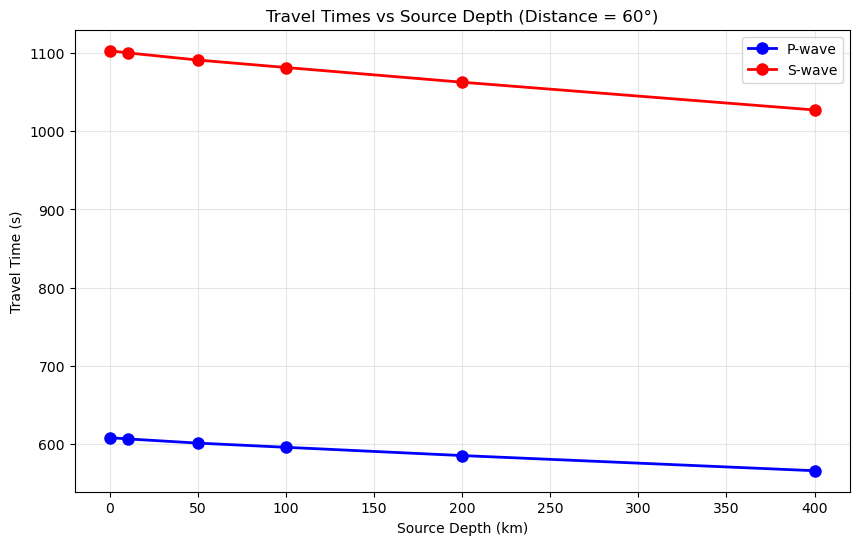

In [15]:
# Plot travel time vs depth
plt.figure(figsize=(10, 6))
plt.plot(depths, p_times, 'bo-', label='P-wave', linewidth=2, markersize=8)
plt.plot(depths, s_times, 'ro-', label='S-wave', linewidth=2, markersize=8)
plt.xlabel('Source Depth (km)')
plt.ylabel('Travel Time (s)')
plt.title(f'Travel Times vs Source Depth (Distance = {distance}°)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 4. Travel Time Curves

Now let's create classic travel time curves showing how P and S wave travel times vary with distance.

Computing travel time curves...
Valid travel time data for 9 distances
Valid travel time data for 9 distances


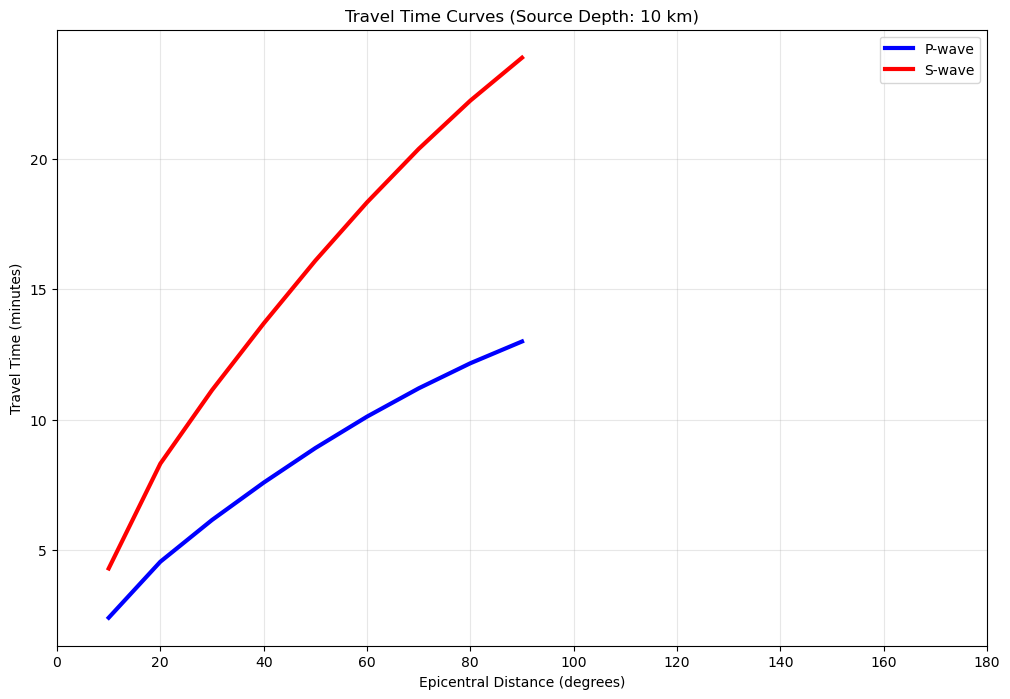

In [16]:
# Compute travel time curves for P and S waves
distances = np.arange(10, 181, 10)  # 10 to 180 degrees
p_times = []
s_times = []
valid_distances = []

print("Computing travel time curves...")
for distance in distances:
    # Get P-wave arrival
    p_arrivals = calculator.calculate_travel_times(
        source_depth=10, distance_deg=distance, phases=['P']
    )
    p_time = p_arrivals[0].time if p_arrivals else None

    # Get S-wave arrival
    s_arrivals = calculator.calculate_travel_times(
        source_depth=10, distance_deg=distance, phases=['S']
    )
    s_time = s_arrivals[0].time if s_arrivals else None

    # Only include distances where both P and S waves are available
    if p_time is not None and s_time is not None:
        valid_distances.append(distance)
        p_times.append(p_time)
        s_times.append(s_time)

print(f"Valid travel time data for {len(valid_distances)} distances")

# Create travel time curve plot
plt.figure(figsize=(12, 8))
plt.plot(valid_distances, np.array(p_times)/60, 'b-', linewidth=3, label='P-wave')
plt.plot(valid_distances, np.array(s_times)/60, 'r-', linewidth=3, label='S-wave')
plt.xlabel('Epicentral Distance (degrees)')
plt.ylabel('Travel Time (minutes)')
plt.title('Travel Time Curves (Source Depth: 10 km)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 180)
plt.show()

## 5. Comparing Different Earth Models

Let's compare how different Earth models (iasp91, prem, ak135) predict travel times.

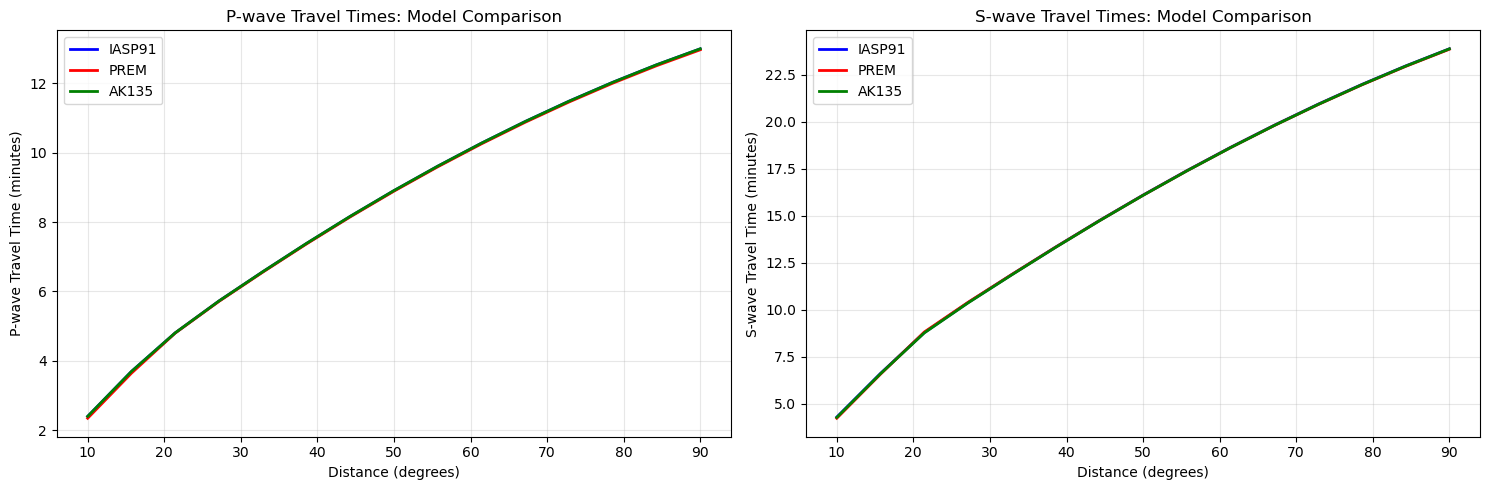

In [8]:
# Parameters
distances = np.linspace(10, 90, 15)
source_depth = 10
models = ['iasp91', 'prem', 'ak135']
colors = ['blue', 'red', 'green']

plt.figure(figsize=(15, 5))

# Plot P-waves
plt.subplot(1, 2, 1)
for model, color in zip(models, colors):
    calc = TravelTimeCalculator(model)
    p_times = []

    for distance in distances:
        arrivals = calc.calculate_travel_times(source_depth, distance)
        for arrival in arrivals:
            if arrival.name == 'P':
                p_times.append(arrival.time)
                break

    plt.plot(distances, np.array(p_times)/60, color=color, linewidth=2, label=model.upper())

plt.xlabel('Distance (degrees)')
plt.ylabel('P-wave Travel Time (minutes)')
plt.title('P-wave Travel Times: Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

# Plot S-waves
plt.subplot(1, 2, 2)
for model, color in zip(models, colors):
    calc = TravelTimeCalculator(model)
    s_times = []

    for distance in distances:
        arrivals = calc.calculate_travel_times(source_depth, distance)
        for arrival in arrivals:
            if arrival.name == 'S':
                s_times.append(arrival.time)
                break

    plt.plot(distances, np.array(s_times)/60, color=color, linewidth=2, label=model.upper())

plt.xlabel('Distance (degrees)')
plt.ylabel('S-wave Travel Time (minutes)')
plt.title('S-wave Travel Times: Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Time-Distance Diagram

Let's create a time-distance diagram showing multiple phases.

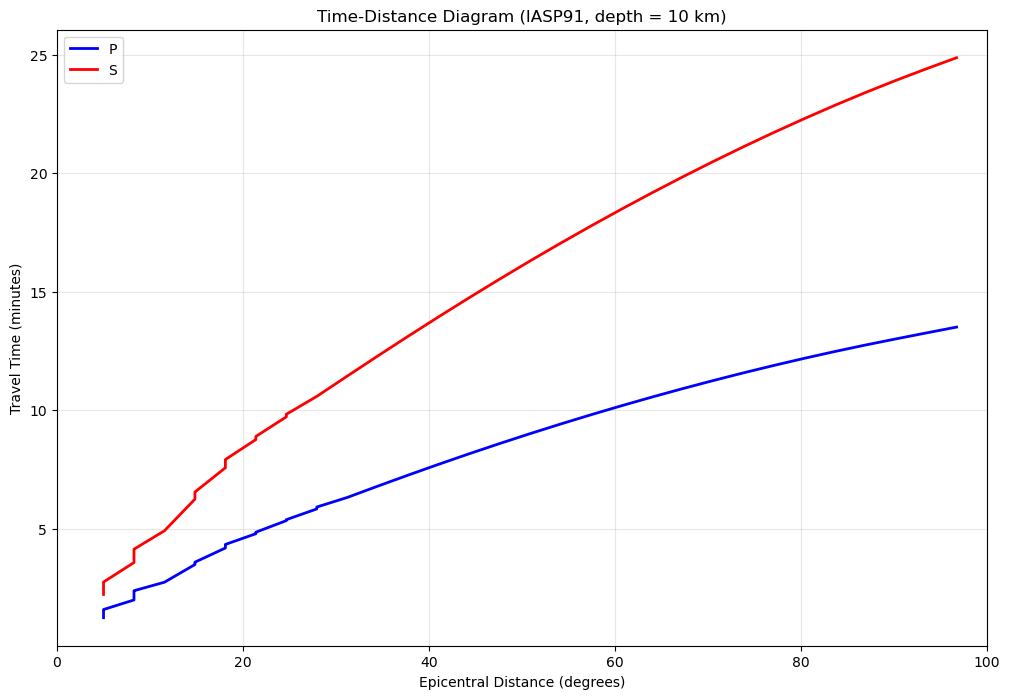

Found phases: ['P', 'S']


In [9]:
# Create a more detailed time-distance plot
distances = np.linspace(5, 100, 30)
source_depth = 10

calc = TravelTimeCalculator('iasp91')

# Collect all arrivals
all_phases = {}

for distance in distances:
    arrivals = calc.calculate_travel_times(source_depth, distance)

    for arrival in arrivals:
        phase_name = arrival.name
        if phase_name not in all_phases:
            all_phases[phase_name] = {'distances': [], 'times': []}

        all_phases[phase_name]['distances'].append(distance)
        all_phases[phase_name]['times'].append(arrival.time)

# Plot the main phases
plt.figure(figsize=(12, 8))

main_phases = ['P', 'S', 'PP', 'SS']
colors = ['blue', 'red', 'cyan', 'magenta']

for phase, color in zip(main_phases, colors):
    if phase in all_phases:
        plt.plot(all_phases[phase]['distances'],
                np.array(all_phases[phase]['times'])/60,
                color=color, linewidth=2, label=phase)

plt.xlabel('Epicentral Distance (degrees)')
plt.ylabel('Travel Time (minutes)')
plt.title(f'Time-Distance Diagram (IASP91, depth = {source_depth} km)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 100)
plt.show()

print(f"Found phases: {list(all_phases.keys())}")

## Summary

In this notebook, we demonstrated:

1. **Basic travel time calculations** using the `TravelTimeCalculator` class
2. **Earth model exploration** using the `EarthModelManager` class
3. **Effect of source depth** on P and S wave travel times
4. **Travel time curves** showing distance dependence
5. **Model comparison** between iasp91, prem, and ak135
6. **Time-distance diagrams** with multiple seismic phases

The `seisray` package provides a simple interface to ObsPy's powerful TauP functionality while maintaining flexibility for research applications.

### Key Takeaways:
- Travel times increase with epicentral distance
- P-waves are faster than S-waves
- Source depth affects travel times (deeper sources generally have shorter times)
- Different Earth models predict slightly different travel times
- Multiple seismic phases exist beyond just P and S waves